<body>
    <section style="border:1px solid RoyalBlue;">
        <section style="background-color:White; font-family:Georgia;text-align:center">
            <h1 style="color:RoyalBlue">Introduction to Data Science</h1>
            <h2 style="color:RoyalBlue">Dr.	Casey Kennington</h2>
            <h2 style="font-family:Courier; text-align:center;">CS-533</h2>
            <br>
            <h2 style="font-family:Garamond;">Final Project Notebook: Longitudinal Analysis between pre-k and non pre-k students</h2>
            <h2 style="font-family:Garamond;">Team Members:</h2>
            <h2 style="font-family:Courier;">Aparna Sankaran and Gerardo Caracas</h2>
            <h2 style="font-family:Courier;">Team Name:</h2>
            <h2 style="font-family:Courier;">"2>/dev/null"</h2>
            <hr/>
        </section>
    </section>
</body>

In [44]:
import pandas as pd
import numpy as np
import matplotlib, matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [45]:
df=pd.read_csv("PreK_project.csv")
df.dropna(subset=['Student_ID'], how='all', inplace = True)

In [46]:
# We need to arrange our StudentID from float to int, and then to string
def convertToBetterIndex(df_t):
    strTbl=[]
    for a in df_t:
        strTbl.append(str(int(a)))
    return strTbl
    

In [47]:
df['Student_ID']=convertToBetterIndex(df['Student_ID'].values)
df.set_index('Student_ID', inplace=True)

In [48]:
# As you can see, here we have a duplicate, and this is preventing us to replicate the brochure plot.
# We will deal with this by removing this entry.
df.loc['164658334']

,Pre_No,TVEP Study,Fall_GRTR_Score,Fall_GRTR_Level,Winter_GRTR_Score,Winter_GRTR_Level,Spring_GRTR_Score,Spring_GRTR_Level,Incomplete_IRI,Fall_LNF,...,Spring_LNF,Spring_LNF_Level,Spring_LSF,Spring_LSF_Level,Spring_LNF_Growth,Spring_LSF_Growth,am_pm,teacher,school,cohort
Student_ID,,,,,,,,,,,,,,,,,,,,,
164658334,1.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
164658334,NaN,NaN,14.0,1.0,18.0,2.0,23.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [49]:
# Removing duplicate entries in index
df = df[~df.index.duplicated(keep='first')]

In [98]:
students=['945765668', '577523557','142728168','325383322','514537372','532834342','275522143','236438768',
          '912457324','492575653','286764562','982494857','2358183654','273972562','127648521',
          '834171656','852221239','643655377','872582144','666683785','855745397','989538648','183837445',
          '983366665','164658334','854644586','923951547','853248442','945653567','386148753','672424336',
          '227388697','296549775','618975655','733624274','867823644','823135663']

students=['945765668', '577523557','142728168','325383322','514537372','532834342','275522143','236438768',
          '912457324','492575653','286764562','982494857','2358183654','273972562','127648521',
          '834171656','852221239','643655377','872582144','666683785','855745397','989538648','183837445',
          '983366665','164658334','854644586','923951547','853248442','945653567','386148753','672424336',
          '227388697','618975655','733624274','867823644','823135663']
# The following table contains all students that were part of the program prek
#296549775
prekst=df.loc[students]

In [8]:
noprk = df.index.isin(students)
# The followint table contains students that were not in the prek program
nonprek=df[~noprk]

In [9]:
def getMean(dataset, indexStr):
    # Remove all Nan in row/index
    dataset.dropna(subset=[indexStr], how='all', inplace = True)
    col=dataset[indexStr]
    return col.mean()

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond; color:solid #229954">Result 1</h2>
        <h3 style="font-family:Garamond;">Replicating results from Boise Pre-K Program Evaluation 2017</h3>
        <h4 style="font-family:Garamond;">Page 7</h4>
        <hr/>
    </section>
</body>

In [10]:
print("Fall LSF No Vista Pre-k = ", getMean(nonprek.copy(), 'Fall_LSF'))
print("Fall LSF Vista Pre-k = ", getMean(prekst.copy(), 'Fall_LSF'))
print("Fall LNF No Vista Pre-k = ", getMean(nonprek.copy(), 'Fall_LNF'))
print("Fall LNF Vista Pre-k = ", getMean(prekst.copy(), 'Fall_LNF'))

Fall LSF No Vista Pre-k =  6.3375
Fall LSF Vista Pre-k =  13.409090909090908
Fall LNF No Vista Pre-k =  16.2
Fall LNF Vista Pre-k =  26.363636363636363


In [11]:
print("Winter LSF No Vista Pre-k = ", getMean(nonprek.copy(), 'Winter_LSF'))
print("Winter LSF Vista Pre-k = ", getMean(prekst.copy(), 'Winter_LSF'))
print("Winter LNF No Vista Pre-k = ", getMean(nonprek.copy(), 'Winter_LNF'))
print("Winter LNF Vista Pre-k = ", getMean(prekst.copy(), 'Winter_LNF'))

Winter LSF No Vista Pre-k =  25.22093023255814
Winter LSF Vista Pre-k =  31.347826086956523
Winter LNF No Vista Pre-k =  32.86046511627907
Winter LNF Vista Pre-k =  36.52173913043478


In [12]:
print("Spring LSF No Vista Pre-k = ", getMean(nonprek.copy(), 'Spring_LSF'))
print("Spring LSF Vista Pre-k = ", getMean(prekst.copy(), 'Spring_LSF'))
print("Spring LNF No Vista Pre-k = ", getMean(nonprek.copy(), 'Spring_LNF'))
print("Spring LNF Vista Pre-k = ", getMean(prekst.copy(), 'Spring_LNF'))

Spring LSF No Vista Pre-k =  40.38297872340426
Spring LSF Vista Pre-k =  45.0
Spring LNF No Vista Pre-k =  41.07446808510638
Spring LNF Vista Pre-k =  46.26086956521739


<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h3 style="font-family:Garamond;">Question : Comparison of Benchmark scores between Vista Pre-K and Non-Vista Pre-k students administed in the Fall</h3>
        <hr/>
    </section>
</body>

In [13]:
def getcol(dataset, indexStr):
    # Remove all Nan in row/index
    dataset.dropna(subset=[indexStr], how='all', inplace = True)
    col=dataset[indexStr]
    return col

def getBenchmark(dataset):
    boolarr = np.array(getcol(dataset, 'Fall_Level')>2, dtype=np.bool)
    boolarr
    BMark = np.sum(boolarr)/len(getcol(dataset, 'Fall_Level'))
    return BMark*100

In [14]:
print("Fall LNF Screening No Vista Pre-k = ", getBenchmark(nonprek.copy()),'%')
print("Fall LNF Screening Vista Pre-k = ", getBenchmark(prekst.copy()),'%')

Fall LNF Screening No Vista Pre-k =  53.75 %
Fall LNF Screening Vista Pre-k =  86.36363636363636 %


<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond; color:solid #229954">Result 2</h2>
        <h3 style="font-family:Garamond;">Replicating results from Boise Pre-K Program Evaluation 2017</h3>
        <h4 style="font-family:Garamond;">Page 9</h4>
        <hr/>
    </section>
</body>

In [15]:
# We need to arrange our StudentID from float to int, and then to string
def convertToInt(df_t):
    strTbl=[]
    for a in df_t:
        strTbl.append(int(a))
    return strTbl
    

In [16]:
def getListValues(dataset, firstSelector, secondSelector):
    tbl = dataset.reset_index()
    data = tbl.groupby([firstSelector])[[secondSelector]].count()
    data = data.reset_index()
    data['firstSelector']=convertToInt(data[firstSelector].values)
    return list(data[secondSelector])

In [17]:
def getBelowAverages(dataset):
    tbl = dataset.reset_index()
    data = tbl.groupby(['Fall_GRTR_Level'])[['Student_ID']].count()
    data = data.reset_index()
    data['Fall_GRTR_Level']=convertToInt(data['Fall_GRTR_Level'].values)
    fall = (list(data['Student_ID']))[0]
    
    data = tbl.groupby(['Winter_GRTR_Level'])[['Student_ID']].count()
    data = data.reset_index()
    data['Winter_GRTR_Level']=convertToInt(data['Winter_GRTR_Level'].values)
    winter = (list(data['Student_ID']))[0]
    
    data = tbl.groupby(['Spring_GRTR_Level'])[['Student_ID']].count()
    data = data.reset_index()
    data['Spring_GRTR_Level']=convertToInt(data['Spring_GRTR_Level'].values)
    spring = (list(data['Student_ID']))[0]
    
    return [fall, winter, spring]
def getAverages(dataset):
    tbl = dataset.reset_index()
    data = tbl.groupby(['Fall_GRTR_Level'])[['Student_ID']].count()
    data = data.reset_index()
    data['Fall_GRTR_Level']=convertToInt(data['Fall_GRTR_Level'].values)
    fall = (list(data['Student_ID']))[1]
    
    data = tbl.groupby(['Winter_GRTR_Level'])[['Student_ID']].count()
    data = data.reset_index()
    data['Winter_GRTR_Level']=convertToInt(data['Winter_GRTR_Level'].values)
    winter = (list(data['Student_ID']))[1]
    
    data = tbl.groupby(['Spring_GRTR_Level'])[['Student_ID']].count()
    data = data.reset_index()
    data['Spring_GRTR_Level']=convertToInt(data['Spring_GRTR_Level'].values)
    spring = (list(data['Student_ID']))[1]
    
    return [fall, winter, spring]
def getAboveAverages(dataset):
    tbl = dataset.reset_index()
    data = tbl.groupby(['Fall_GRTR_Level'])[['Student_ID']].count()
    data = data.reset_index()
    data['Fall_GRTR_Level']=convertToInt(data['Fall_GRTR_Level'].values)
    fall = (list(data['Student_ID']))[2]
    
    data = tbl.groupby(['Winter_GRTR_Level'])[['Student_ID']].count()
    data = data.reset_index()
    data['Winter_GRTR_Level']=convertToInt(data['Winter_GRTR_Level'].values)
    winter = (list(data['Student_ID']))[2]
    
    data = tbl.groupby(['Spring_GRTR_Level'])[['Student_ID']].count()
    data = data.reset_index()
    data['Spring_GRTR_Level']=convertToInt(data['Spring_GRTR_Level'].values)
    spring = (list(data['Student_ID']))[2]
    
    return [fall, winter, spring]

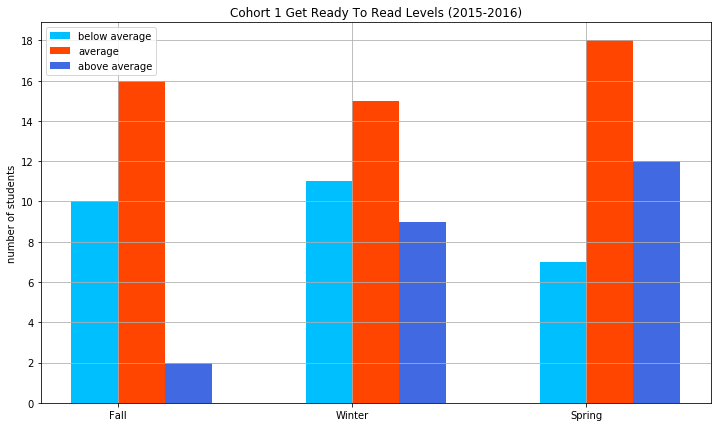

In [18]:
fig, ax = plt.subplots(figsize=(12, 7))
N = 3 #Number of groups
width = 0.40         # the width of the bars
ind = np.arange(N)    # the x locations for the groups

x=[0, 2, 4]
fall = getListValues(prekst.copy(), 'Fall_GRTR_Level','Student_ID')

ba = getBelowAverages(prekst.copy())
av = getAverages(prekst.copy())
aa = getAboveAverages(prekst.copy())

#ax = plt.figure().gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

p1 = ax.bar(x,ba, width, color='deepskyblue', bottom=0)
p2 = ax.bar(ind*2 + width , av, width,color='orangered')
p3 = ax.bar(ind*2 + width*2, aa, width,color='royalblue')

ax.set_title('Cohort 1 Get Ready To Read Levels (2015-2016)')
ax.set_xticks((ind*2) + width/2)
ax.set_xticklabels(('Fall', 'Winter', 'Spring'))
ax.set_ylabel('number of students')

ax.grid(True)
ax.legend((p1[0], p2[0], p3[0]), ('below average', 'average', 'above average'),loc='upper left')
ax.autoscale_view()
plt.show()

In [19]:
prekst.columns

Index(['Pre_No', 'TVEP Study', 'Fall_GRTR_Score', 'Fall_GRTR_Level',
       'Winter_GRTR_Score', 'Winter_GRTR_Level', 'Spring_GRTR_Score',
       'Spring_GRTR_Level', 'Incomplete_IRI', 'Fall_LNF', 'Fall_Level',
       'Fall_LSF', 'Winter_LNF', 'Winter_LNF_Level', 'Winter_LSF',
       'Winter_LSF_Level', 'Winter_LNF_Growth', 'Winter_LSF_Growth',
       'Spring_LNF', 'Spring_LNF_Level', 'Spring_LSF', 'Spring_LSF_Level',
       'Spring_LNF_Growth', 'Spring_LSF_Growth', 'am_pm', 'teacher', 'school',
       'cohort'],
      dtype='object')

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond; color:solid #229954">Trending improvement in Get Ready To Read score</h2>
        <h3 style="font-family:Garamond;">Question: Are students who start the pre-k program, show improvement from fall to spring on their Get Ready To Read scores?</h3>
        <hr/>
    </section>
</body>

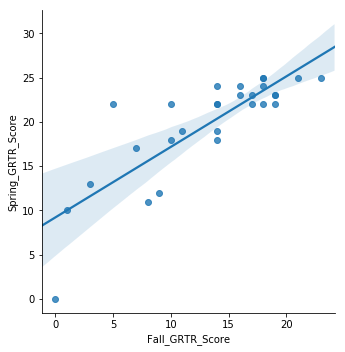

In [20]:
sns.pairplot(prekst, x_vars="Fall_GRTR_Score", y_vars="Spring_GRTR_Score",kind="reg",height=5,)

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond; color:solid #229954">Rate of improvement on pre-k and no pre-k students together</h2>
        <h3 style="font-family:Garamond;">Question: On Kindergardent, do we see any difference on improvement rate between kids with and without pre-k?</h3>
        <h4>Preliminary observation: Here we will use the slope of our regression to measure that and we do see that kids with pre-k have a higher rate of imporovement (higher slope) on both, LNF and LSF</h4>
        <hr/>
    </section>
</body>

LNF Scores for pre-k Students
LNF Scores for pre-k Students


(0, 100)

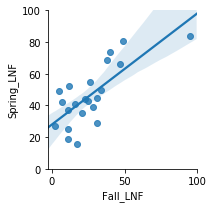

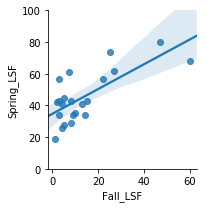

In [21]:
print("LNF Scores for pre-k Students")
p1=sns.pairplot(prekst, x_vars=["Fall_LNF"],y_vars="Spring_LNF", kind='reg',height=3)
axes = p1.axes
axes[0,0].set_ylim(0,100)
ax.set_title('Distribution play counts per artist')
print("LNF Scores for pre-k Students")
p2=sns.pairplot(prekst, x_vars=["Fall_LSF"],y_vars="Spring_LSF", kind='reg',height=3)
axes = p2.axes
axes[0,0].set_ylim(0,100)

LNF Scores for no pre-k Students
LSF Scores for no pre-k Students


(0, 100)

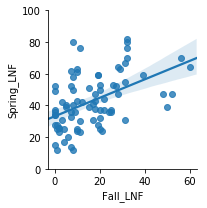

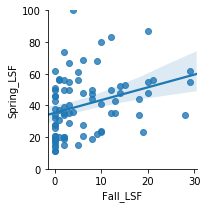

In [22]:
print("LNF Scores for no pre-k Students")
p1=sns.pairplot(nonprek, x_vars=["Fall_LNF"],y_vars="Spring_LNF", kind='reg',height=3)
axes = p1.axes
p1.axes[0,0].set_ylim(0,100)
print("LSF Scores for no pre-k Students")
p2=sns.pairplot(nonprek, x_vars=["Fall_LSF"],y_vars="Spring_LSF", kind='reg',height=3)
axes = p2.axes
axes[0,0].set_ylim(0,100)

Now let's get the real numbers on rate of learning (our m slope from the regression)

In [23]:
# Import SK Learn train test split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
def getSlope(X, y):
    # Assign variables to capture train test split output
    #X_train, X_test, y_train, y_test = train_test_split(X, y)
    # Instantiate
    linreg = LinearRegression()
    linreg.fit(X, y)
    return linreg.coef_[0]

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h3 style="font-family:Garamond;">Question: What is the quantitative learning rate in LNF from students with and without Pre-k</h3>
        <hr/>
    </section>
</body>

In [24]:
toEval = nonprek.copy()
X = toEval['Fall_LNF']
y = toEval['Winter_LNF']
X[0]=0 # Fix an issue because the first sample is Nan thus ffill is ineffective for first sample
X=X.fillna(method='ffill')
y=y.fillna(method='ffill')
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)
print("LNF Learning rate for studenst non pre-K From Fall to Winter =",getSlope(X,y))


LNF Learning rate for studenst non pre-K From Fall to Winter = [0.69921721]


In [25]:
toEval = prekst.copy()
X = toEval['Fall_LNF']
y = toEval['Winter_LNF']
X[0]=0 # Fix an issue because the first sample is Nan thus ffill is ineffective for first sample
X=X.fillna(method='ffill')
y=y.fillna(method='ffill')
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)
print("LNF Learning rate for studenst pre-K From Fall to Winter =",getSlope(X,y))

LNF Learning rate for studenst pre-K From Fall to Winter = [1.01872332]


<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h3 style="font-family:Garamond;">Question: What is the quantitative learning rate in LSF from students with and without Pre-k</h3>
        <hr/>
    </section>
</body>

In [26]:
toEval = nonprek.copy()
X = toEval['Fall_LSF']
y = toEval['Winter_LSF']
X[0]=0 # Fix an issue because the first sample is Nan thus ffill is ineffective for first sample
X=X.fillna(method='ffill')
y=y.fillna(method='ffill')
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)
print("LSF Learning rate for studenst non pre-K From Fall to Winter =",getSlope(X,y))


LSF Learning rate for studenst non pre-K From Fall to Winter = [1.1361879]


In [27]:
toEval = prekst.copy()
X = toEval['Fall_LSF']
y = toEval['Winter_LSF']
X[0]=0 # Fix an issue because the first sample is Nan thus ffill is ineffective for first sample
X=X.fillna(method='ffill')
y=y.fillna(method='ffill')
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)
print("LSF Learning rate for studenst pre-K From Fall to Winter =",getSlope(X,y))

LSF Learning rate for studenst pre-K From Fall to Winter = [1.194067]


<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h3 style="font-family:Garamond;">Question: Is there a difference in learning rate between high performers from both groups?</h3>
        <h3 style="font-family:Garamond;">Observation: The following plots have the same scale</h3>
        <hr/>
    </section>
</body>

In [28]:
pkhp = prekst[prekst['Fall_Level'] == 3]
npkhp = nonprek[nonprek['Fall_Level'] == 3]

LNF Scores for pre-k Students


seaborn.axisgrid.PairGrid

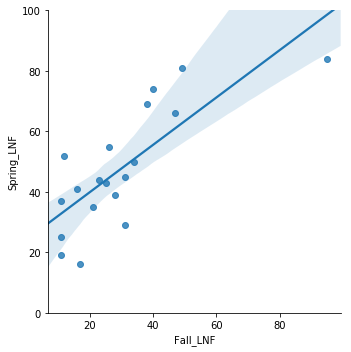

In [29]:
print("LNF Scores for pre-k Students")
p1=sns.pairplot(pkhp, x_vars=["Fall_LNF"],y_vars="Spring_LNF", kind='reg',height=5)
axes = p1.axes
axes[0,0].set_ylim(0,100)
type(p1)

LSF Scores for no pre-k Students


(0, 100)

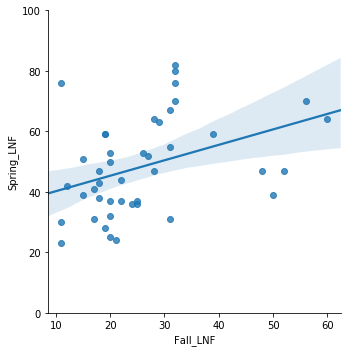

In [30]:
print("LSF Scores for no pre-k Students")
p2=sns.pairplot(npkhp, x_vars=["Fall_LNF"],y_vars="Spring_LNF", kind='reg',height=5)
axes = p2.axes
axes[0,0].set_ylim(0,100)

LNF Scores for pre-k Students
LSF Scores for no pre-k Students


(0, 100)

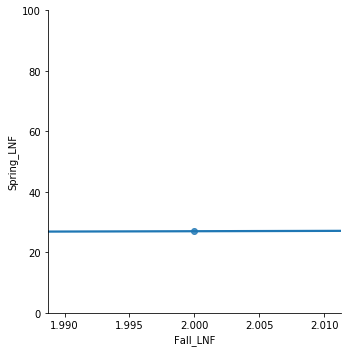

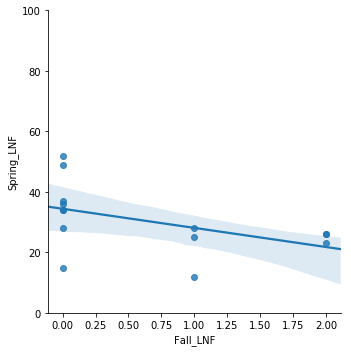

In [31]:
pkhp = prekst[prekst['Fall_Level'] == 1]
npkhp = nonprek[nonprek['Fall_Level'] == 1]
print("LNF Scores for pre-k Students")
p1=sns.pairplot(pkhp, x_vars=["Fall_LNF"],y_vars="Spring_LNF", kind='reg',height=5)
axes = p1.axes
axes[0,0].set_ylim(0,100)
type(p1)
print("LSF Scores for no pre-k Students")
p2=sns.pairplot(npkhp, x_vars=["Fall_LNF"],y_vars="Spring_LNF", kind='reg',height=5)
axes = p2.axes
axes[0,0].set_ylim(0,100)

LNF Scores for pre-k Students
LSF Scores for no pre-k Students


(0, 100)

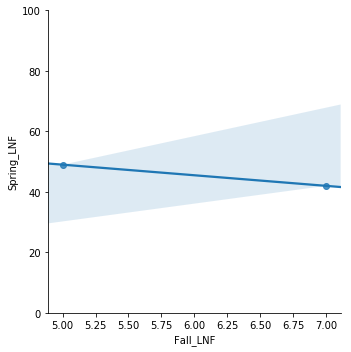

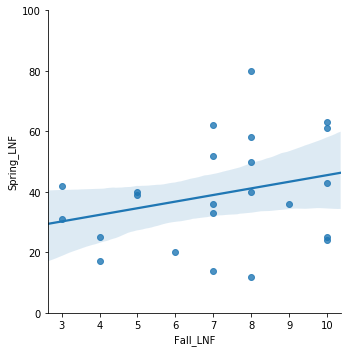

In [32]:
pkhp = prekst[prekst['Fall_Level'] == 2]
npkhp = nonprek[nonprek['Fall_Level'] == 2]
print("LNF Scores for pre-k Students")
p1=sns.pairplot(pkhp, x_vars=["Fall_LNF"],y_vars="Spring_LNF", kind='reg',height=5)
axes = p1.axes
axes[0,0].set_ylim(0,100)
type(p1)
print("LSF Scores for no pre-k Students")
p2=sns.pairplot(npkhp, x_vars=["Fall_LNF"],y_vars="Spring_LNF", kind='reg',height=5)
axes = p2.axes
axes[0,0].set_ylim(0,100)

Observations so far that we can formulate questions/answers.

We did this for mid and low performers and alghouth they scored higher from Fall to Spring, the learning rate was flat or decreased a bit. This might explain why in 'Result 1'

## NOTE: ##

### Column Description:###

*Student Id:* Student Number

*Pre_No:* Whether the student did Pre-k or not

*TVEP study:* Students were considered for pre-k selection

*Fall/Spring/Winter:* Evaluation time  period

*GRTR:* Get Ready To Read screening test (covers only pre-k students 2015-16) 

*IRI:* Idaho Reading Indicator(It is the test from k to 3th. Grade. 2016-17)

*Incomplete_IRI:* Student didn’t attend or do atleast one of the time period test

*LSF:* Letter Sound Fluency (2016-17)

*LNF:* Letter Name Fluency (2016-17)

*LNF_Growth:* difference between last LNF period test and the 1st

*LSF_Growth:* difference between last LSF period test and the 1st

*Cohort:* Indicates the batch (1,2)

## Check students grades by school and teacher ##

LNF Scores for pre-k Students
LNF Scores for pre-k Students


(0, 100)

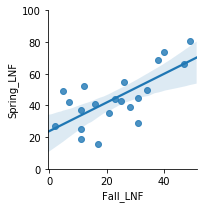

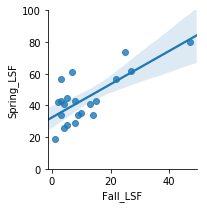

In [84]:
print("LNF Scores for pre-k Students")
p1=sns.pairplot(prekst, x_vars=["Fall_LNF"],y_vars="Spring_LNF", kind='reg',height=3)
axes = p1.axes
axes[0,0].set_ylim(0,100)
ax.set_title('Distribution play counts per artist')
print("LNF Scores for pre-k Students")
p2=sns.pairplot(prekst, x_vars=["Fall_LSF"],y_vars="Spring_LSF", kind='reg',height=3)
axes = p2.axes
axes[0,0].set_ylim(0,100)

In [85]:
def plot1(table, name):
    p1=sns.pairplot(table, x_vars=["Fall_LNF"],y_vars="Spring_LNF", kind='reg',height=3)
    axes = p1.axes
    axes[0,0].set_ylim(0,100)
    ax.set_title('LNF for '+ name)
    print("LNF Scores for pre-k Students")
    p2=sns.pairplot(table, x_vars=["Fall_LSF"],y_vars="Spring_LSF", kind='reg',height=3)
    axes = p2.axes
    axes[0,0].set_ylim(0,100)
    ax.set_title('LSF for '+ name)


LNF Scores for pre-k Students


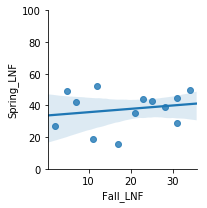

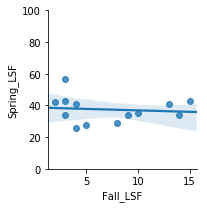

In [86]:
#npkhp = nonprek[nonprek['Fall_Level'] == 2]
# Teacher: AM 0
#          PM 1
tmp=prekst[prekst['am_pm'] == 0] #am
plot1(tmp, "am")

LNF Scores for pre-k Students


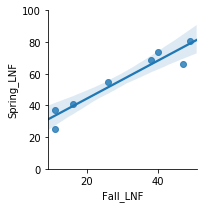

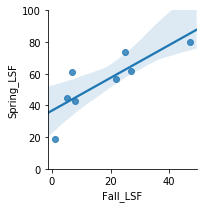

In [87]:
tmp=prekst[prekst['am_pm'] == 1] #PM
plot1(tmp, "pm")

LNF Scores for pre-k Students


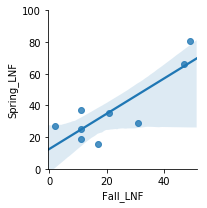

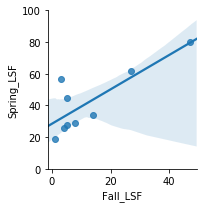

In [88]:
tmp=prekst[prekst['school'] == 0 ] #am
plot1(tmp, "school")

LNF Scores for pre-k Students


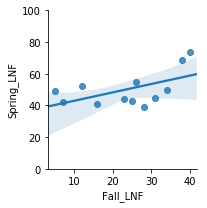

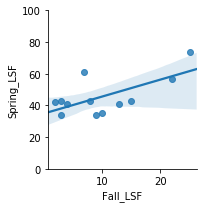

In [89]:
tmp=prekst[prekst['school'] == 1] #am
plot1(tmp, "school")

LNF Scores for pre-k Students


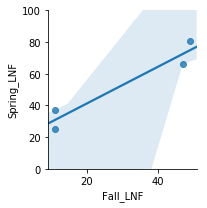

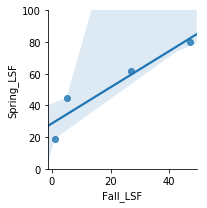

In [90]:
tmp=prekst[(prekst['school'] == 0) & (prekst['am_pm'] == 1) ] #am
plot1(tmp, "school")

LNF Scores for pre-k Students


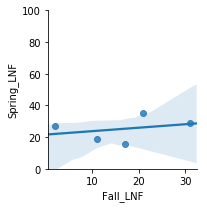

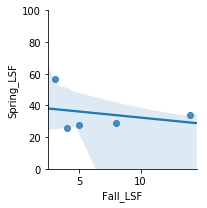

In [101]:
tmp=prekst[(prekst['school'] == 0) & (prekst['am_pm'] == 0) ] #am
plot1(tmp, "school")

LNF Scores for pre-k Students


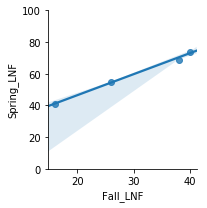

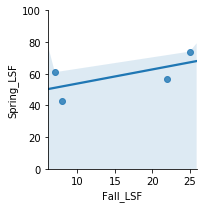

In [92]:
tmp=prekst[(prekst['school'] == 1) & (prekst['am_pm'] == 1) ] #am
plot1(tmp, "school")

LNF Scores for pre-k Students


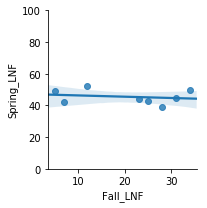

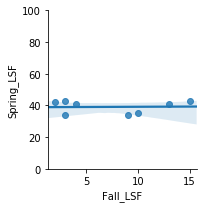

In [102]:
tmp=prekst[(prekst['school'] == 1) & (prekst['am_pm'] == 0) ] #am
plot1(tmp, "school")

LNF Scores for pre-k Students


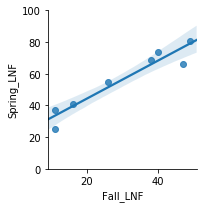

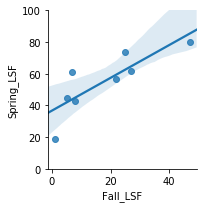

In [99]:
tmp=prekst[(prekst['am_pm'] == 1) ] #am
plot1(tmp, "school")

LNF Scores for pre-k Students


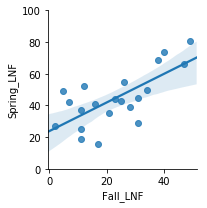

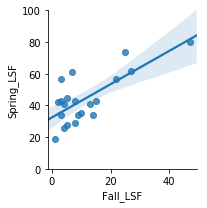

In [100]:
plot1(prekst, "school")